In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

In [2]:
df = pd.read_csv("./dataset.csv")

In [3]:
# example of how we get the number of artists for a song
len('Melvin Taylor;Lucky Peterson;Titus Williams;Ray "Killer" Allison'.split(';'))

4

In [4]:
# df["artists_count"] = df["artists"].apply(lambda x: len(str(x).split(';')))
df["duration_mins"] = df["duration_ms"]/60000
df["artists_list"] = df["artists"].apply(lambda x: str(x).split(';'))
df["artists_count"] = df["artists_list"].apply(len)
df.head

<bound method NDFrame.head of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1      

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'duration_mins', 'artists_list', 'artists_count'],
      dtype='object')

# Topics

1. Do albums with either one or multiple highly popular songs see a positive spillover
effect on their engagement and popularity in comparison to other songs within the
album
2. How to the musical attributes differ between songs when an artist collaborates
compared to a solo performance
3. Is there an association between the presence of multiple artist collaboration on an
album and a higher listener engagement or total streams on the album?

So there are some problems with these that I probably should have caught sooner.

`listener engagement` isn't a metric that we have access to nor can we even really approximate it. There's no metric that tells us how long a person listened to a song before skipping or how many skips versus full plays a song has gotten for example. We face a similar problem with the question of `total streams`. For some reason, there is no `streams` or `plays` metric so we'll have to work with the `popularity` variable instead.

`1` is a bit strange to try and test. There is no A/B testing for a problem like `1`, either the megahit is on an album or it isn't and there's no way to see how popular another song on the album would have been in the absence of that megahit. I'm genuinely kind of at a loss on how to go about exploring that so I'll have to leave that to y'all for tomorrow.

`2` and `3` are also strange but not so strange as to make it impossible for me to get started on here.

## Topics 2 & 3 - the effect of collaborating on track attributes

First is deciding on which track attributes to consider

If I were to be generous, I would take a look at `popularity`, `duration_ms`, `duration_mins`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `valence`, and `tempo` to see what's up with these. The other remaining metrics don't seem to be very relevant.

We basically want to see if there's a correlation between any of these variables and the number of artists on a track.

The biggest and easiest difference maker I can imagine in this regard would be genre. I imagine pop musicians collabing with other pop musicians would want to up the `danceability` and `energy` of a collab track in order to chase the next big hit. Dance music producers might do similar things but also add to the `loudness` or `tempo` of a track to try and get more play time in sets. Just some spitballing, these choices are largely arbitrary and are meant to cast a wide net.

In [6]:
metrics = ['popularity', 'duration_ms', 'duration_mins', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
correlations = []
for genre in df["track_genre"].unique():
    entry = {'genre':genre}
    genre_frame = df[df["track_genre"] == genre]
    for metric in metrics:
        entry[metric] = genre_frame["artists_count"].corr(genre_frame[metric])
    correlations.append(entry)
#correlations

In [7]:
#genre-correlation datafram
gcdf = pd.DataFrame(correlations)
gcdf.head

<bound method NDFrame.head of            genre  popularity  duration_ms  duration_mins  danceability  \
0       acoustic    0.038514    -0.033069      -0.033069      0.056114   
1       afrobeat    0.044545     0.050431       0.050431     -0.045235   
2       alt-rock   -0.090806     0.071300       0.071300      0.110157   
3    alternative   -0.060925    -0.036622      -0.036622      0.259522   
4        ambient   -0.219416     0.138183       0.138183      0.006945   
..           ...         ...          ...            ...           ...   
109       techno    0.034212    -0.092561      -0.092561     -0.066944   
110       trance    0.078554     0.016625       0.016625      0.050983   
111     trip-hop   -0.017533     0.029001       0.029001      0.068267   
112      turkish    0.053036    -0.023092      -0.023092      0.174345   
113  world-music    0.156684     0.060309       0.060309     -0.043861   

       energy  loudness  speechiness  acousticness  instrumentalness  \
0   -0.11

In [8]:
gcdf.describe()

,popularity,duration_ms,duration_mins,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.008442,0.036755,0.036755,0.043224,0.003034,0.027712,0.053354,-0.001958,-0.045963,-0.010367,-0.008616
std,0.093164,0.109153,0.109153,0.101304,0.116841,0.130542,0.112863,0.103834,0.096661,0.084682,0.058358
min,-0.336184,-0.182158,-0.182158,-0.357532,-0.400480,-0.476591,-0.209066,-0.286185,-0.372699,-0.271761,-0.133639
25%,-0.036629,-0.030539,-0.030539,-0.010560,-0.058733,-0.032972,-0.014166,-0.061444,-0.082969,-0.061125,-0.035234
50%,0.015010,0.013919,0.013919,0.047122,0.003028,0.041474,0.039398,-0.008774,-0.026025,-0.018040,-0.009804
75%,0.062138,0.071131,0.071131,0.105402,0.076506,0.100840,0.111112,0.045039,0.002613,0.038826,0.029392
max,0.219931,0.485104,0.485104,0.359171,0.377450,0.320509,0.627386,0.383233,0.317226,0.206650,0.150341


Most of these correlations, postive or negative, are fairly weak and we see only one instance of a maximum correlation coefficient of >0.5.

Let's continue on with what we have though.

It'll be mostly pretty weak correlations but let's consider correlations whose values are $>0.35$ or $<-0.35$. Kind of arbitrary, this. Check me on whether or not this is a good enough line to draw in the sand ok?

+ve correlations:
- duration
- danceability
- energy
- speechiness
- acousticness

-ve correlations:
- danceability
- energy
- loudness
- instrumentalness

let's try and grab the genres that actually have this correlation

In [9]:
# print(list(gcdf.sort_values(by="duration_mins", ascending = False).iloc[:5]["genre"]))
print(f"{5}\n{gcdf.sort_values(by="duration_mins", ascending = False).iloc[:5][["genre", "duration_mins"]]}")

5
        genre  duration_mins
68     latino       0.485104
21  dancehall       0.451250
89  reggaeton       0.372486
37       funk       0.328569
88     reggae       0.270742


In [10]:
#positive correlations
p_corrs = ['duration_mins', 'danceability', 'energy', 'speechiness', 'acousticness']
p_corrs_dicts = []
# print("positive correlations")
for corr in p_corrs:
    print(f"\n\n{corr}\n{gcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]]}")
    vals = list(gcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]][corr])
    i = 0
    while i < 5:
        if vals[i] < 0.35:
            break;
        i += 1
    # print(list(gcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]]["genre"])[:i])
    p_corrs_dicts.append({corr:list(gcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]]["genre"])[:i]})

#negative correlations
n_corrs = ['danceability', 'energy', 'loudness', 'instrumentalness']
n_corrs_dicts = []
# print(f"\n\nnegative correlations")
for corr in n_corrs:
    print(f"\n\n{corr}\n{gcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]]}")
    vals = list(gcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]][corr])
    i = 0
    while i < 5:
        if vals[i] > -0.35:
            break;
        i += 1
    # print(list(gcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]]["genre"])[:i])
    n_corrs_dicts.append({corr:list(gcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]]["genre"])[:i]})

print(p_corrs_dicts)
print(n_corrs_dicts)



duration_mins
        genre  duration_mins
68     latino       0.485104
21  dancehall       0.451250
89  reggaeton       0.372486
37       funk       0.328569
88     reggae       0.270742


danceability
          genre  danceability
43       groove      0.359171
3   alternative      0.259522
41         goth      0.258352
37         funk      0.214551
5         anime      0.206320


energy
         genre    energy
55      indian  0.377450
31     electro  0.348484
26      disney  0.253980
81         pop  0.205623
32  electronic  0.191404


speechiness
       genre  speechiness
38    garage     0.627386
5      anime     0.323619
9     brazil     0.309492
48  hardcore     0.279771
87     r-n-b     0.274163


acousticness
      genre  acousticness
76    opera      0.383233
39   german      0.325218
59  iranian      0.282061
11  british      0.190302
65    k-pop      0.178423


danceability
      genre  danceability
39   german     -0.357532
28      dub     -0.204017
11  british     -0.179

positive correlations


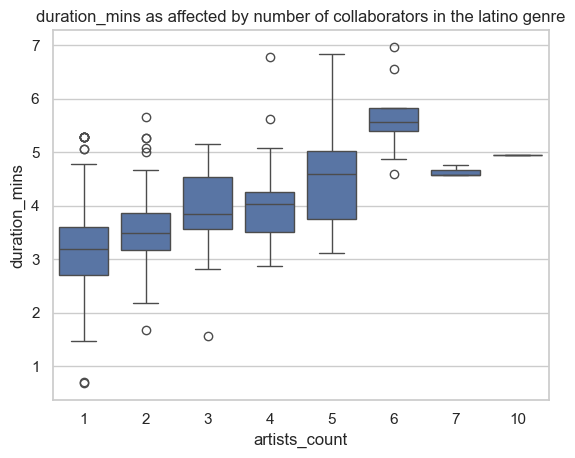

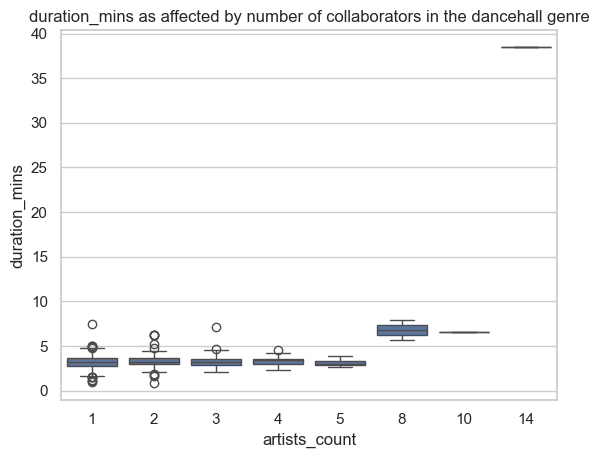

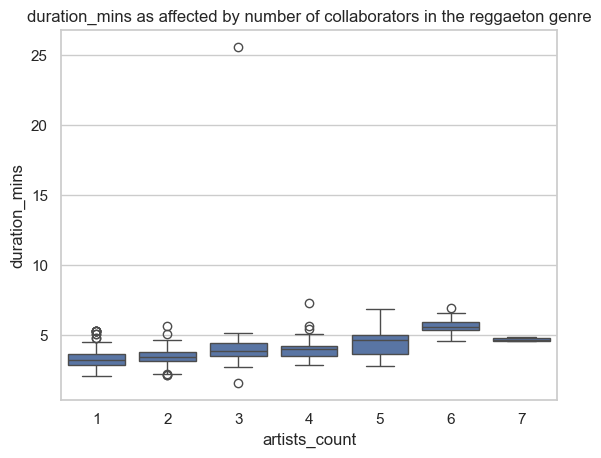

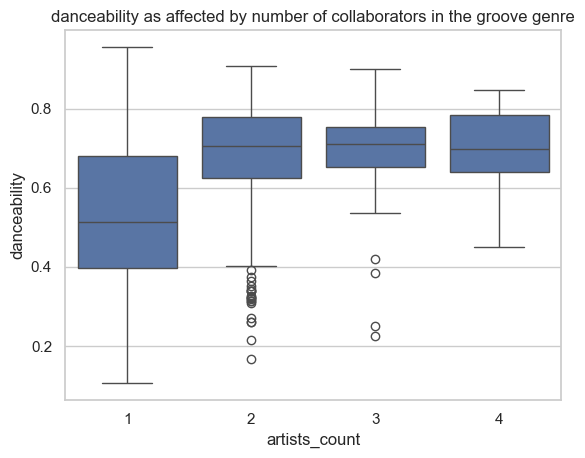

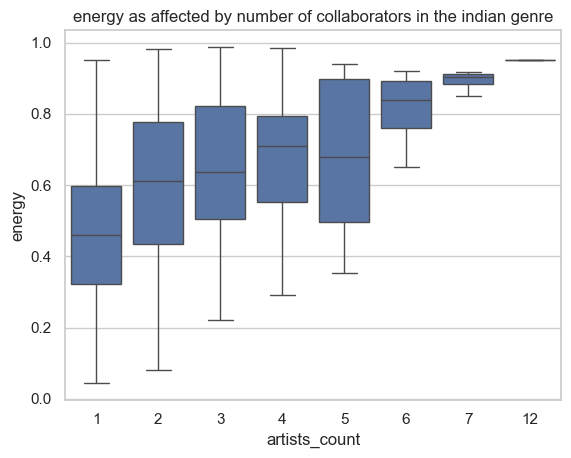

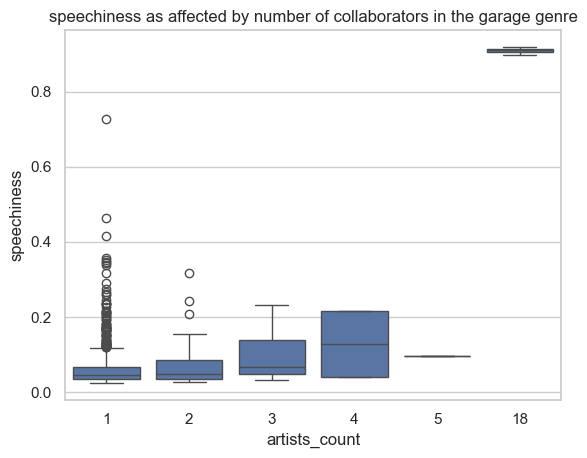

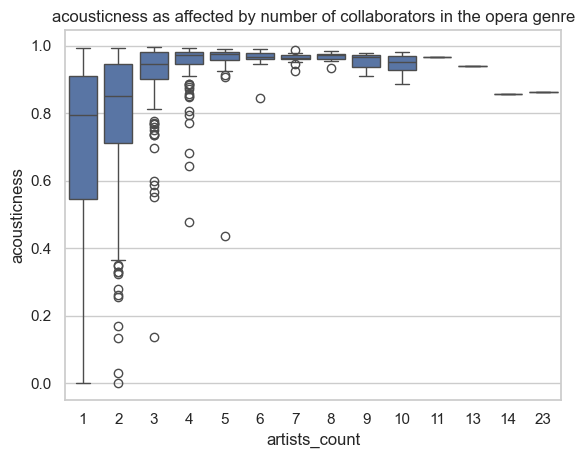

negative correlations


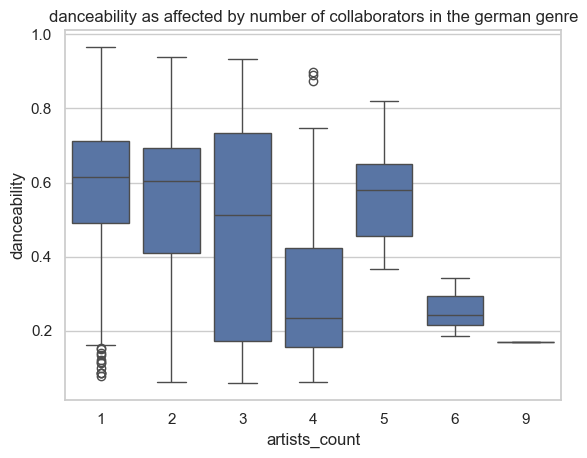

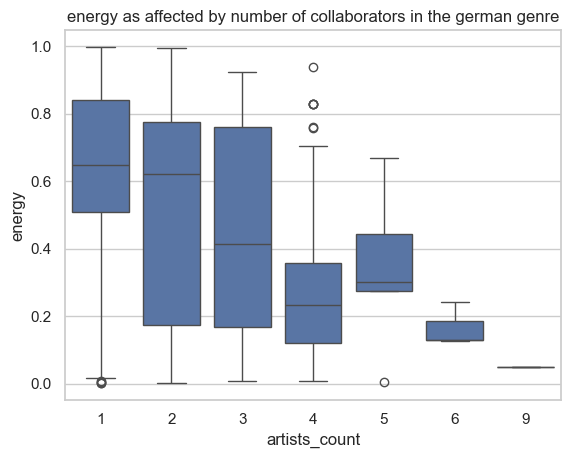

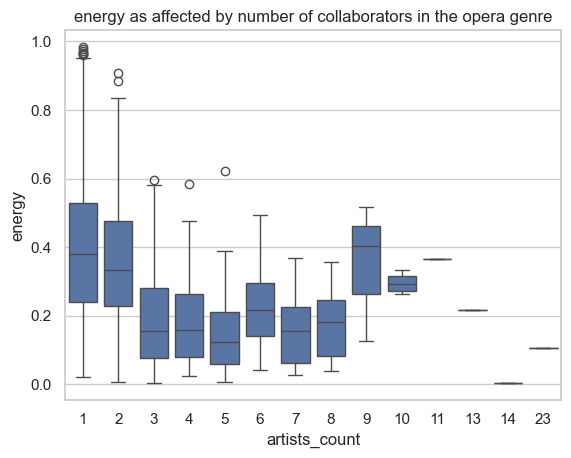

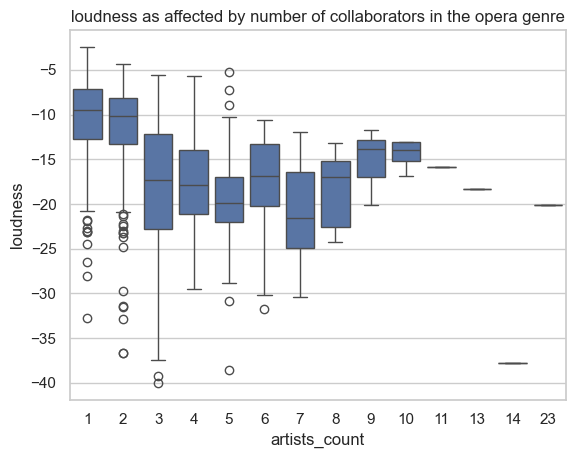

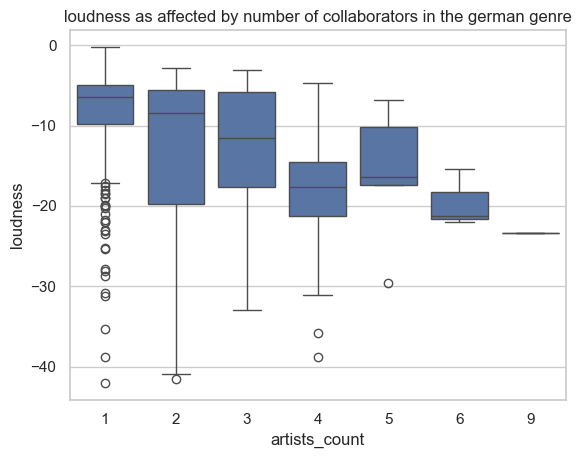

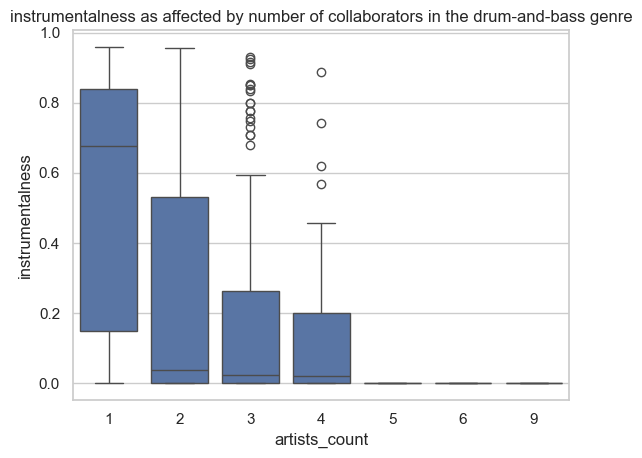

In [11]:
print("positive correlations")
for d in p_corrs_dicts:
    metric = list(d.keys())[0]
    for genre in d[metric]:
        sns.boxplot(data=df[df["track_genre"]==genre], x="artists_count", y=metric).set(title=f"{metric} as affected by number of collaborators in the {genre} genre")
        plt.show()
print("negative correlations")
for d in n_corrs_dicts:
    metric = list(d.keys())[0]
    for genre in d[metric]:
        sns.boxplot(data=df[df["track_genre"]==genre], x="artists_count", y=metric).set(title=f"{metric} as affected by number of collaborators in the {genre} genre")
        plt.show()

But hold on. It might be a resonable assumption that we jumped the gun (read: I made the decision for you guys instead of waiting for input and made a glaring error in forgetting something really fundamental in exploring the data) in separating the data out into different genres.

To cover our bases, let's see if there are any correlations between `artists_count` and the metrics within `metrics` to see if there is anything there.

In [12]:
for metric in metrics:
    print(f'{metric}: {np.round(df["artists_count"].corr(df[metric]), 3)}')

popularity: 0.007
duration_ms: 0.027
duration_mins: 0.027
danceability: 0.067
energy: -0.033
loudness: -0.015
speechiness: 0.037
acousticness: 0.016
instrumentalness: -0.024
valence: -0.038
tempo: -0.028


Lo and behold, there wasn't anything there. Put properly, there is no significant correlation between the number of artists on a track and any of the metrics.

Now what if we redid the whole of this analysis comparing solo tracks vs collaborative tracks.

In [13]:
df["colab"] = df["artists_count"].apply(lambda x: bool(int(x)-1))

for metric in metrics:
    print(f'{metric}: {np.round(df["colab"].corr(df[metric]), 3)}')

popularity: 0.013
duration_ms: 0.011
duration_mins: 0.011
danceability: 0.128
energy: -0.005
loudness: 0.027
speechiness: 0.03
acousticness: -0.02
instrumentalness: -0.031
valence: -0.04
tempo: -0.014


And now separating out into genres then diving deeper into the most relevant of them.

In [14]:
correlations = []
for genre in df["track_genre"].unique():
    entry = {'genre':genre}
    genre_frame = df[df["track_genre"] == genre]
    for metric in metrics:
        entry[metric] = genre_frame["colab"].corr(genre_frame[metric])
    correlations.append(entry)
#new genre-correlation datafram
ngcdf = pd.DataFrame(correlations)
ngcdf.head

<bound method NDFrame.head of            genre  popularity  duration_ms  duration_mins  danceability  \
0       acoustic    0.025361    -0.045658      -0.045658      0.049227   
1       afrobeat    0.039964     0.015297       0.015297     -0.044884   
2       alt-rock   -0.089217     0.060196       0.060196      0.104776   
3    alternative   -0.070470    -0.034537      -0.034537      0.259197   
4        ambient   -0.248266     0.187220       0.187220      0.056642   
..           ...         ...          ...            ...           ...   
109       techno    0.058696    -0.126561      -0.126561     -0.076059   
110       trance    0.027388     0.032897       0.032897      0.061252   
111     trip-hop    0.013110     0.028275       0.028275      0.077656   
112      turkish    0.075662    -0.086503      -0.086503      0.193503   
113  world-music    0.149582     0.070344       0.070344     -0.029056   

       energy  loudness  speechiness  acousticness  instrumentalness  \
0   -0.12

In [15]:
ngcdf.describe()

,popularity,duration_ms,duration_mins,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.009154,0.011910,0.011910,0.048615,0.002005,0.035039,0.043805,-0.001429,-0.045905,-0.017724,-0.007031
std,0.115132,0.091201,0.091201,0.111045,0.126238,0.142140,0.106344,0.113478,0.116807,0.091467,0.061432
min,-0.557027,-0.221904,-0.221904,-0.309639,-0.484307,-0.463269,-0.304645,-0.312739,-0.409450,-0.350604,-0.137808
25%,-0.034463,-0.053762,-0.053762,-0.012146,-0.060310,-0.024737,-0.033685,-0.062587,-0.096882,-0.081105,-0.040490
50%,0.021485,-0.000760,-0.000760,0.051803,0.014430,0.041822,0.043438,-0.007393,-0.030374,-0.019780,-0.006597
75%,0.071273,0.067941,0.067941,0.106523,0.073538,0.110660,0.115579,0.048643,0.007244,0.041750,0.032732
max,0.290773,0.349529,0.349529,0.388786,0.384180,0.354894,0.357336,0.418698,0.378465,0.222217,0.178330


In [16]:
#positive correlations
np_corrs = ['duration_mins', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']
np_corrs_dicts = []
# print("positive correlations")
for corr in np_corrs:
    print(f"\n\n{corr}\n{ngcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]]}")
    vals = list(ngcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]][corr])
    i = 0
    while i < 5:
        if vals[i] < 0.35:
            break;
        i += 1
    np_corrs_dicts.append({corr:list(ngcdf.sort_values(by=corr, ascending = False).iloc[:5][["genre", corr]]["genre"])[:i]})

#negative correlations
nn_corrs = ['popularity', 'energy', 'loudness', 'instrumentalness', 'valence']
nn_corrs_dicts = []
# print(f"\n\nnegative correlations")
for corr in nn_corrs:
    print(f"\n\n{corr}\n{ngcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]]}")
    vals = list(ngcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]][corr])
    i = 0
    while i < 5:
        if vals[i] > -0.35:
            break;
        i += 1
    nn_corrs_dicts.append({corr:list(ngcdf.sort_values(by=corr, ascending = True).iloc[:5][["genre", corr]]["genre"])[:i]})

print(np_corrs_dicts)
print(nn_corrs_dicts)



duration_mins
        genre  duration_mins
68     latino       0.349529
89  reggaeton       0.224381
40     gospel       0.213689
81        pop       0.197128
4     ambient       0.187220


danceability
          genre  danceability
43       groove      0.388786
37         funk      0.314908
38       garage      0.287221
3   alternative      0.259197
5         anime      0.252223


energy
      genre    energy
31  electro  0.384180
55   indian  0.381078
26   disney  0.250810
81      pop  0.203440
88   reggae  0.195494


loudness
            genre  loudness
55         indian  0.354894
31        electro  0.307822
13  chicago-house  0.301366
10      breakbeat  0.298072
28            dub  0.260750


speechiness
     genre  speechiness
5    anime     0.357336
9   brazil     0.298853
87   r-n-b     0.282519
41    goth     0.269091
37    funk     0.261698


acousticness
        genre  acousticness
76      opera      0.418698
16  classical      0.356986
65      k-pop      0.306115
59    iran

positive correlations


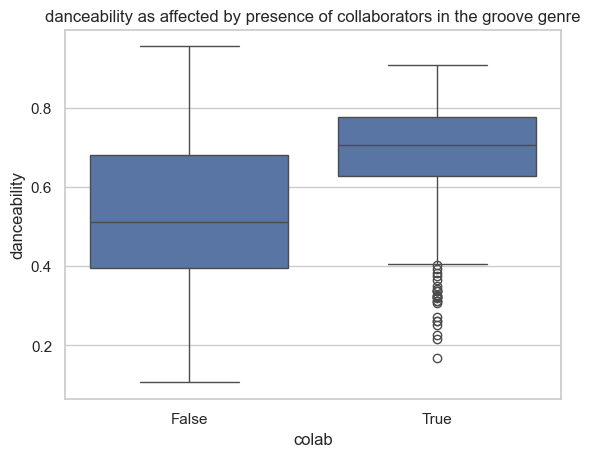

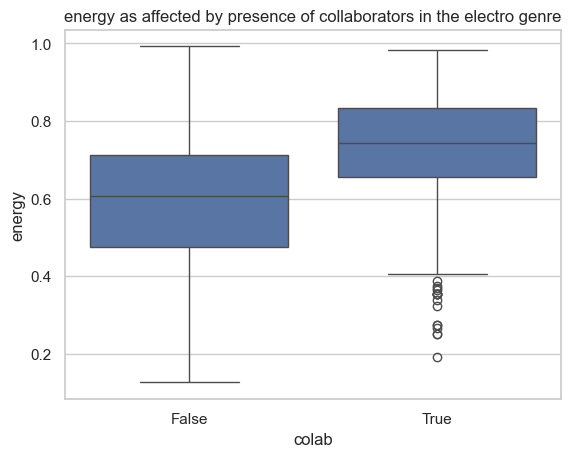

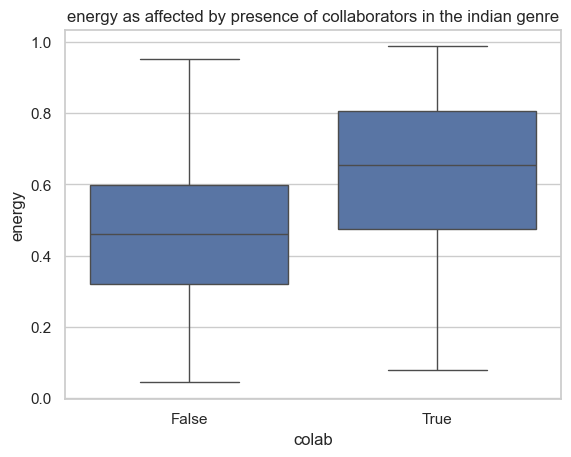

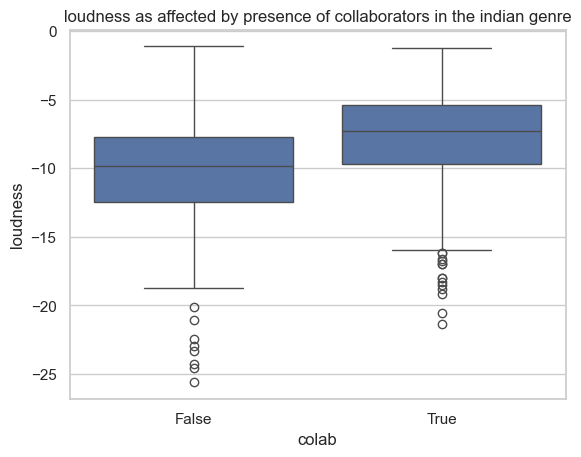

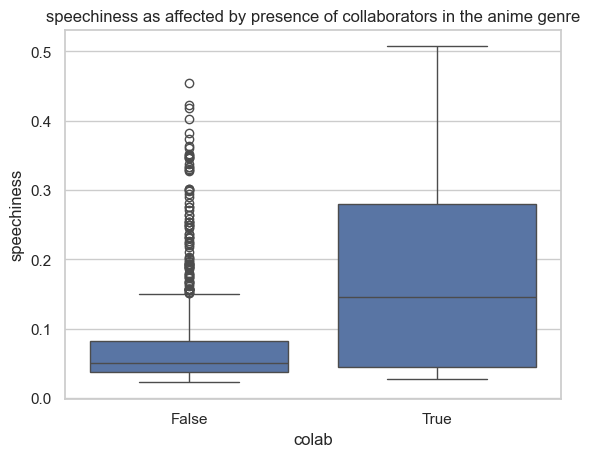

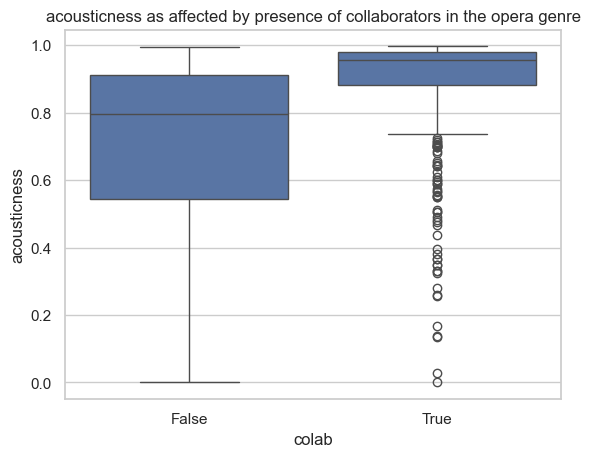

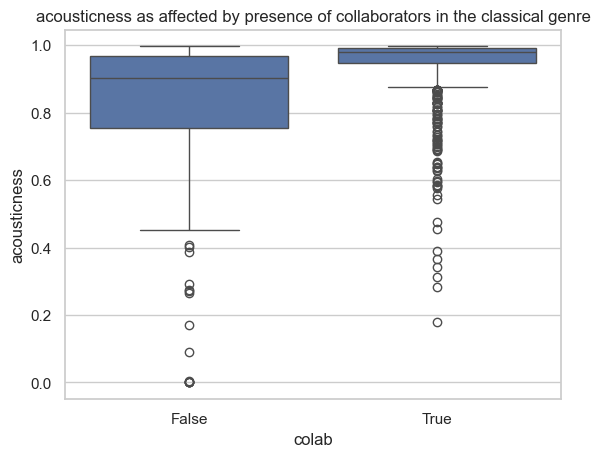

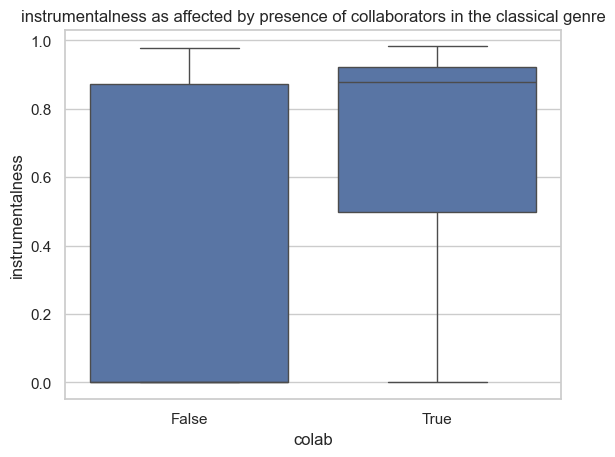

negative correlations


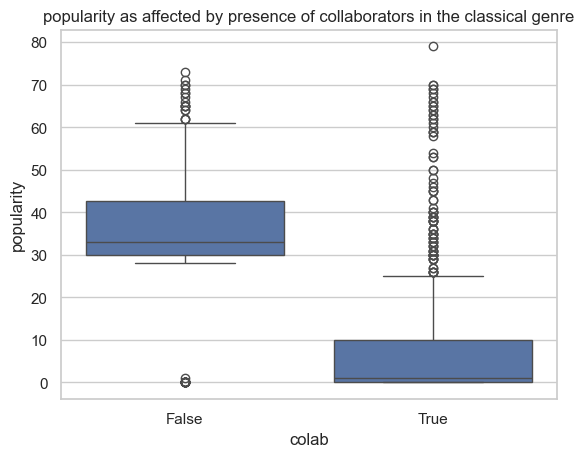

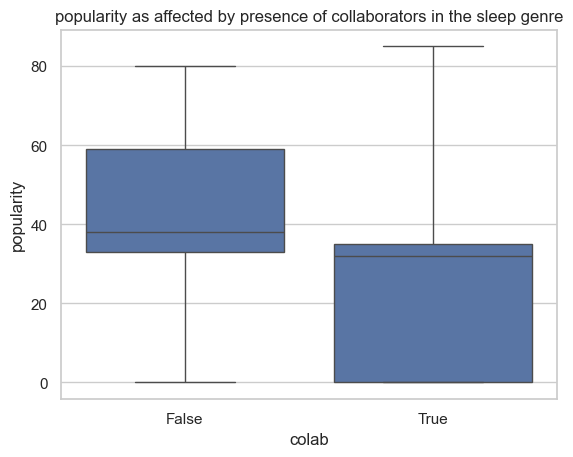

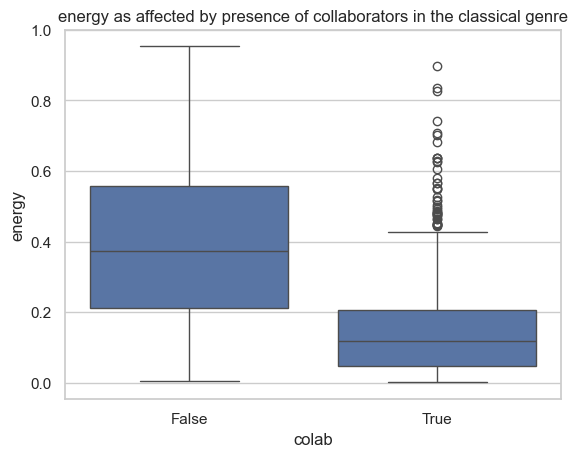

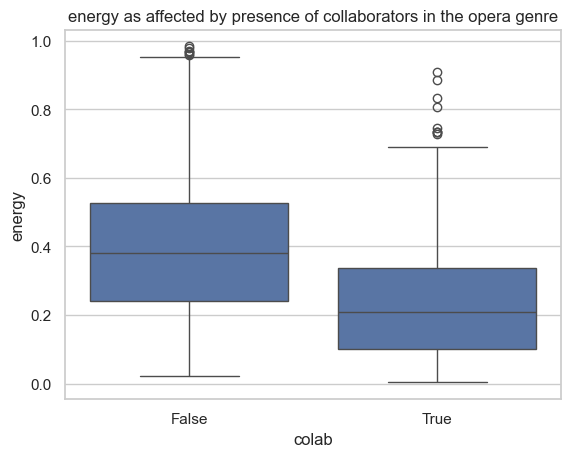

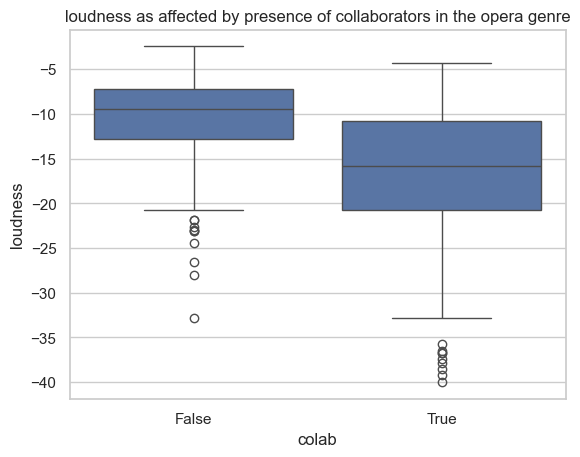

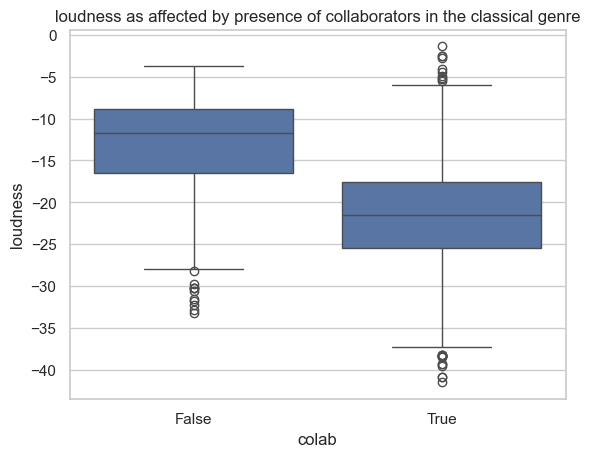

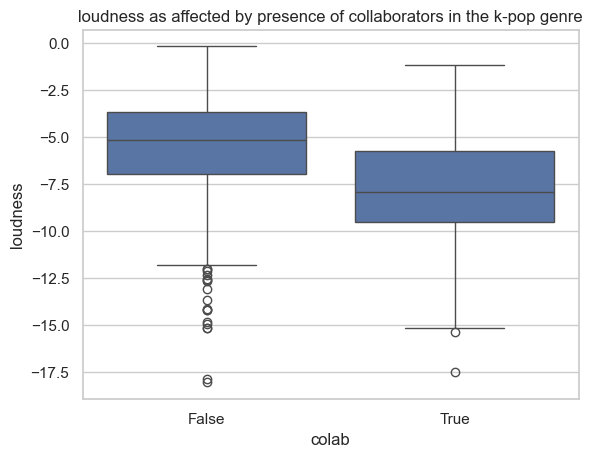

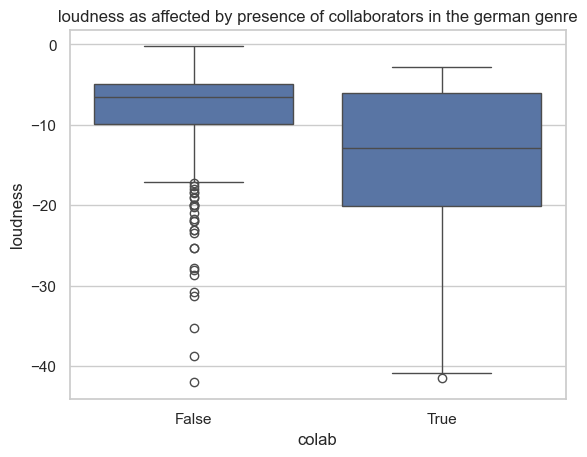

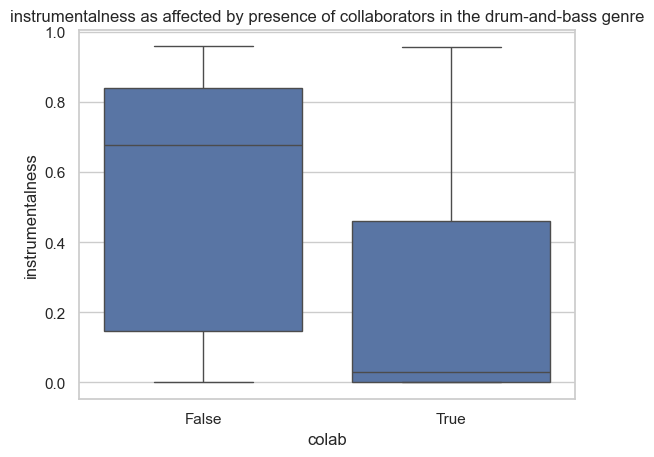

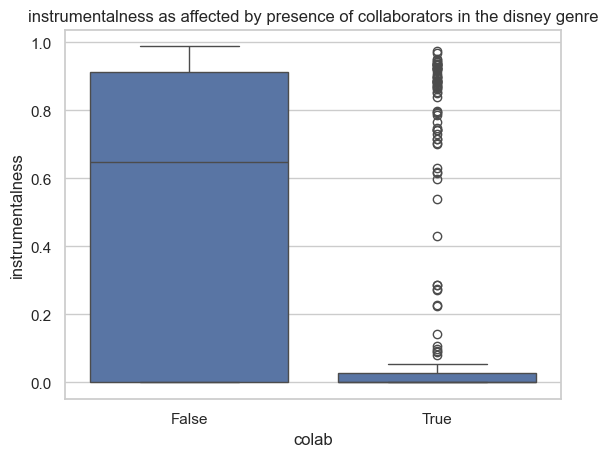

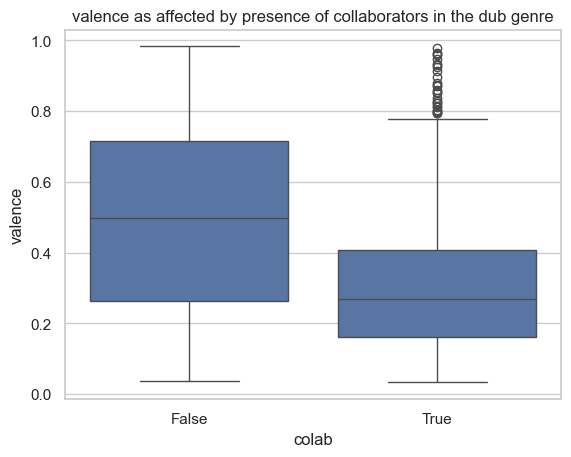

In [17]:
print("positive correlations")
for d in np_corrs_dicts:
    metric = list(d.keys())[0]
    for genre in d[metric]:
        sns.boxplot(data=df[df["track_genre"]==genre], x="colab", y=metric).set(title=f"{metric} as affected by presence of collaborators in the {genre} genre")
        plt.show()
print("negative correlations")
for d in nn_corrs_dicts:
    metric = list(d.keys())[0]
    for genre in d[metric]:
        sns.boxplot(data=df[df["track_genre"]==genre], x="colab", y=metric).set(title=f"{metric} as affected by presence of collaborators in the {genre} genre")
        plt.show()

Now to redo some of this analysis but specifically testing for albums and popularity because I forgot that we added that to the subtopics somehow.

In [18]:
adf = df.groupby('album_name').filter(lambda x: len(x) > 1)
adf['colab'] = adf.groupby('album_name')['colab'].transform(lambda x: x.any())
adf['popularity'] = adf.groupby('album_name')['popularity'].transform(lambda x: x.mean())
adf

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins,artists_list,artists_count,colab
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.000000,230666,False,0.676,0.461,...,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433,[Gen Hoshino],1,False
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.000000,149610,False,0.420,0.166,...,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500,[Ben Woodward],1,False
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,39.000000,198853,False,0.618,0.443,...,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217,[Chord Overstreet],1,True
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.000000,214240,False,0.688,0.481,...,0.000000,0.1890,0.6660,98.017,4,acoustic,3.570667,[Tyrone Wells],1,False
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,64.857143,229400,False,0.407,0.147,...,0.000003,0.0913,0.0765,141.284,3,acoustic,3.823333,"[A Great Big World, Christina Aguilera]",2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,23.500000,384999,False,0.172,0.235,...,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650,[Rainy Lullaby],1,False
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,23.500000,385000,False,0.174,0.117,...,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667,[Rainy Lullaby],1,False
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,25.692308,271466,False,0.629,0.329,...,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433,[Cesária Evora],1,True
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,47.000000,283893,False,0.587,0.506,...,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550,[Michael W. Smith],1,False


In [19]:
print(f'popularity: {np.round(adf["colab"].corr(adf['popularity']), 3)}')

popularity: -0.231


No significant correlation in the non-genre separated version of this data set.

In [20]:
correlations = []
for genre in df["track_genre"].unique():
    entry = {'genre':genre, 'popularity':adf[adf["track_genre"]==genre]["colab"].corr(adf['popularity'])}
    # genre_frame = df[df["track_genre"] == genre]
    # for metric in metrics:
    #     entry[metric] = genre_frame["colab"].corr(genre_frame[metric])
    correlations.append(entry)
#new genre-correlation datafram
agcdf = pd.DataFrame(correlations)
agcdf.head

<bound method NDFrame.head of            genre  popularity
0       acoustic   -0.164950
1       afrobeat    0.100811
2       alt-rock   -0.544036
3    alternative   -0.594253
4        ambient   -0.171551
..           ...         ...
109       techno   -0.017159
110       trance   -0.118800
111     trip-hop   -0.010820
112      turkish   -0.173919
113  world-music    0.200682

[114 rows x 2 columns]>

In [21]:
agcdf.describe()

,popularity
count,114.000000
mean,-0.181334
std,0.255465
min,-0.608795
25%,-0.405174
50%,-0.184866
75%,-0.009637
max,0.411097


We are spoiled for choice for actually strong correlations so let's only take those here.

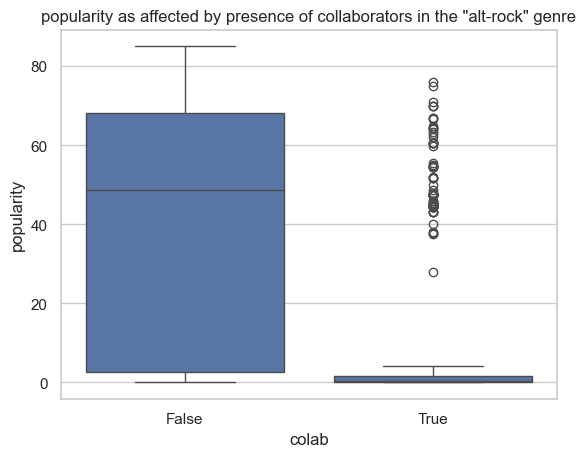

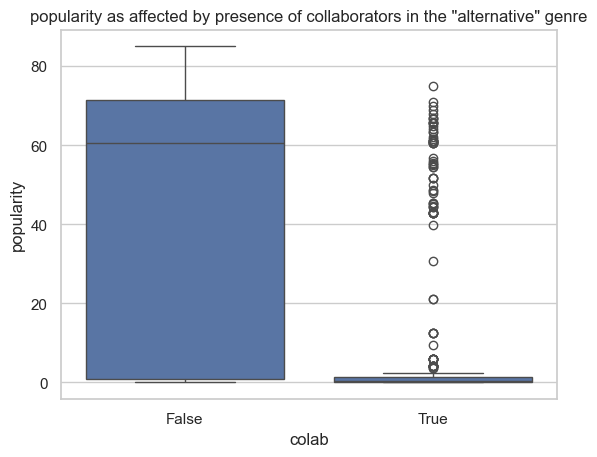

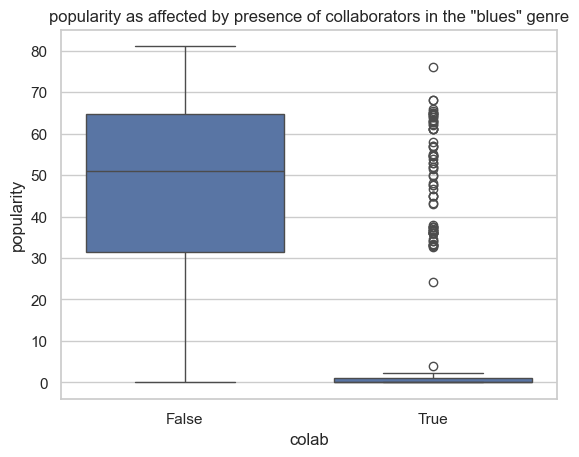

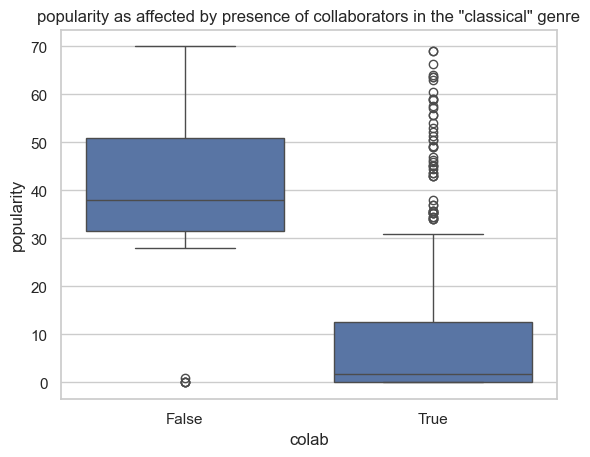

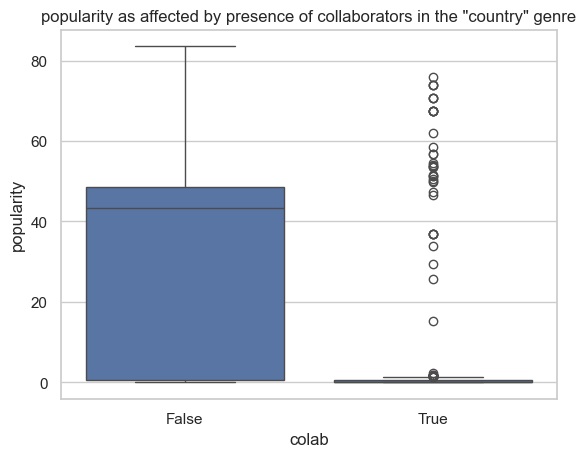

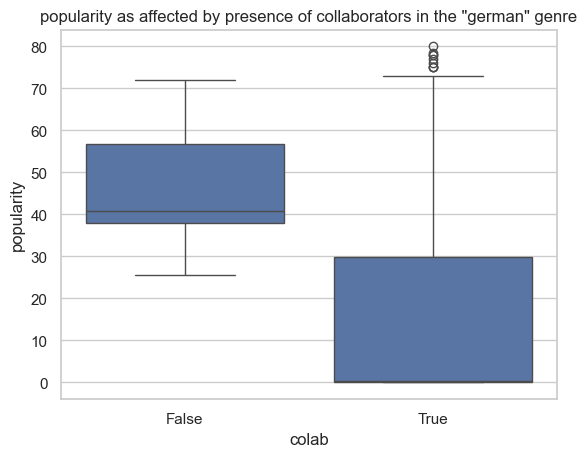

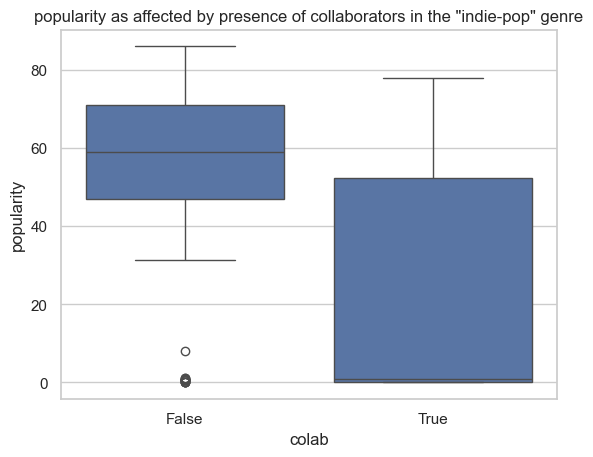

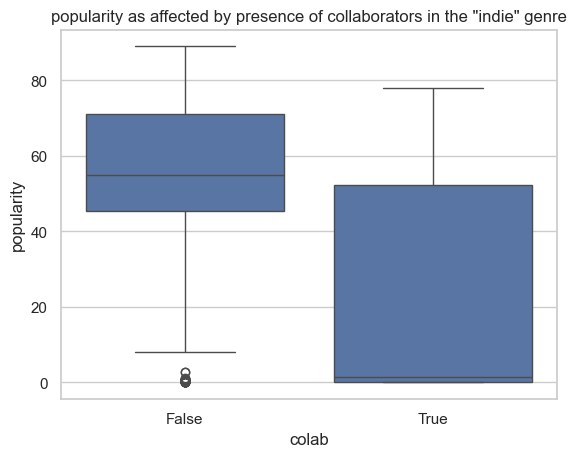

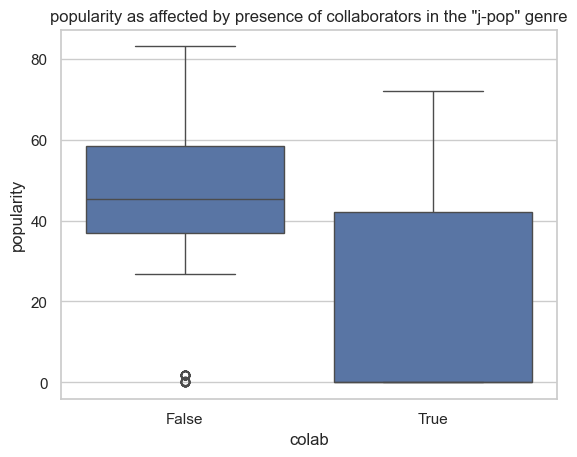

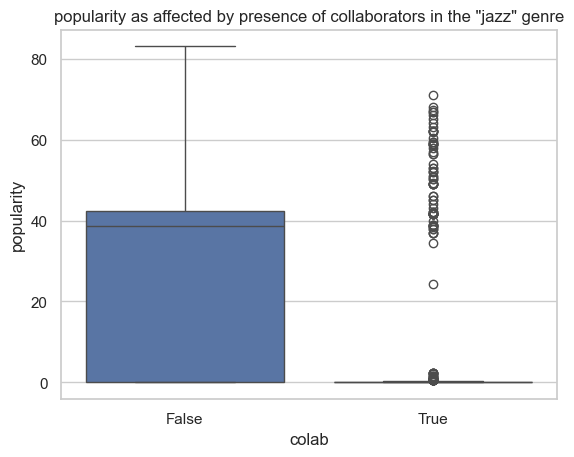

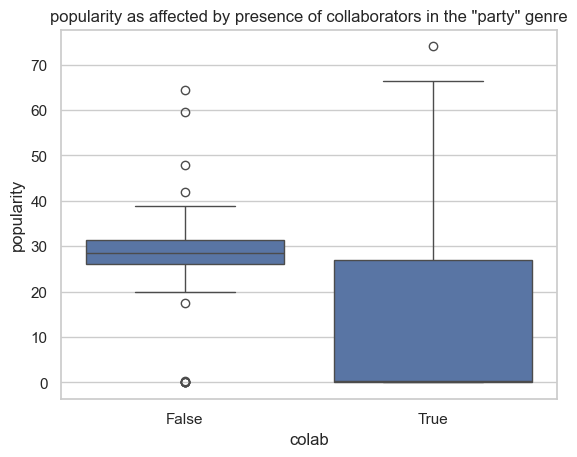

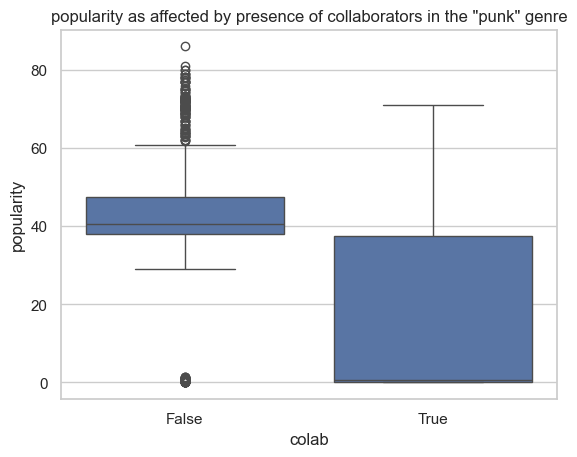

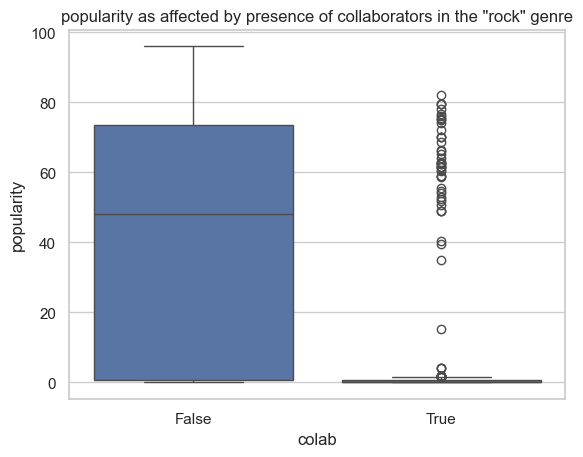

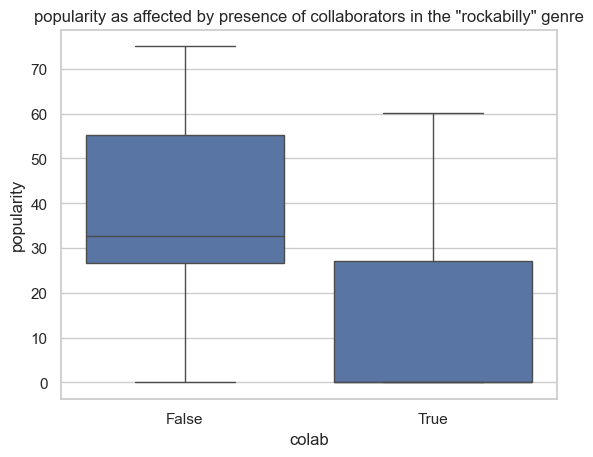

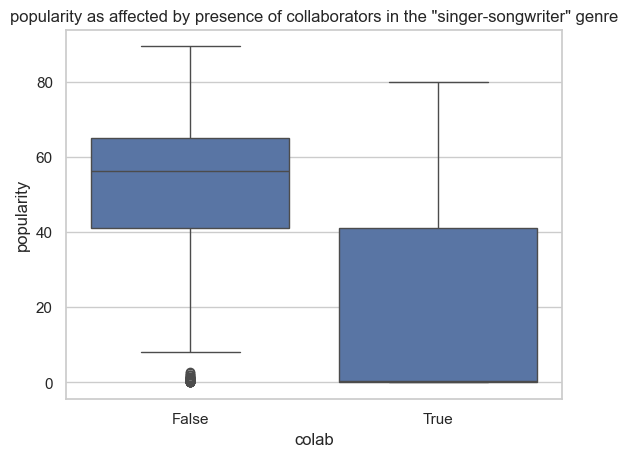

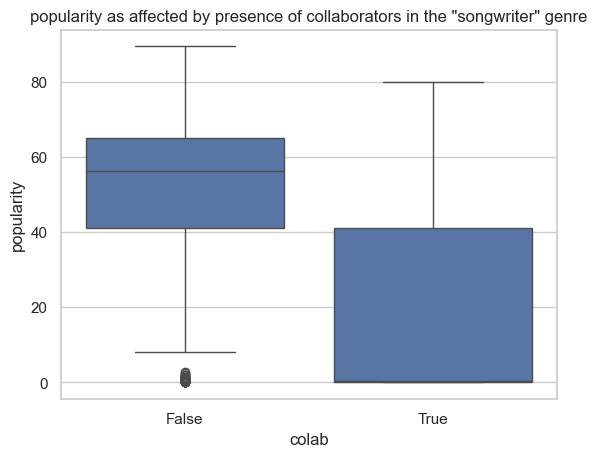

['alt-rock', 'alternative', 'blues', 'classical', 'country', 'german', 'indie-pop', 'indie', 'j-pop', 'jazz', 'party', 'punk', 'rock', 'rockabilly', 'singer-songwriter', 'songwriter']


In [22]:
for genre in list(agcdf[agcdf["popularity"] <= -0.5]["genre"]):
    sns.boxplot(data=adf[adf["track_genre"]==genre], x="colab", y='popularity').set(title=f"popularity as affected by presence of collaborators in the \"{genre}\" genre")
    plt.show()

print(list(agcdf[agcdf["popularity"] <= -0.5]["genre"]))

Now I think we can get back to topics 2 & 3.

2. How to the musical attributes differ between songs when an artist collaborates
compared to a solo performance
3. Is there an association between the presence of multiple artist collaboration on an
album and a higher listener engagement or total streams on the album?

#### Topic 3

The only metric we have to approximate listener engagement or total streams is the `popularity` metric. With that in mind, we can draw some conclusions for our data set.

WIth regard to albums, there is a very weak negative correlation between the presence of collaborators on the album and the average `popularity` of songs on the album when taking in the data set as a whole.

For specific genres (`alt-rock`, `alternative`, `blues`, `classical`, `country`, `german`, `indie-pop`, `indie`, `j-pop`, `jazz`, `party`, `punk`, `rock`, `rockabilly`, `singer-songwriter`, and `songwriter`) there is a strong negative correlation ($\le 0.5$) between `popularity` and `colab`.

So in the genres of `alt-rock`, `alternative`, `blues`, `classical`, `country`, `german`, `indie-pop`, `indie`, `j-pop`, `jazz`, `party`, `punk`, `rock`, `rockabilly`, `singer-songwriter`, and `songwriter`, there is a strong negative correlation between whether or not there are collaborators on an album and its popularity.

#### Topic 2

The number of collaborators on a track had very little bearing upon the musical attributes of a track when taking on the data set as a whole. Though there were some notable correlations born out when looking at the data set when separated into different genres.

Some of the notable correlations by genre and attribute when looking at the mere presence of collaborators:
genre|correlation strength|attribute
-:|:-:|:-
`opera`|0.4|`acousticness`
`classical`|-0.55|`popularity`
`sleep`|-0.44|^
`classical`|-0.48|`energy`
`opera`|-0.41|^
`opera`| -0.46|`loudness`
`classical`| -0.42|^
 `drum-and-bass`|  -0.41|`instrumentalness`


some of the notable correlations by genre and attribute when looking at the number of collaborators:
genre|correlation strength|attribute
-:|:-:|:-
 `latino`   |    0.49|`duration_mins`
`dancehall`|       0.45|^
`opera` |-0.48|`loudness`

Adjusted Popularity Threshold: 17.0
Number of Low-Popularity Genres: 112


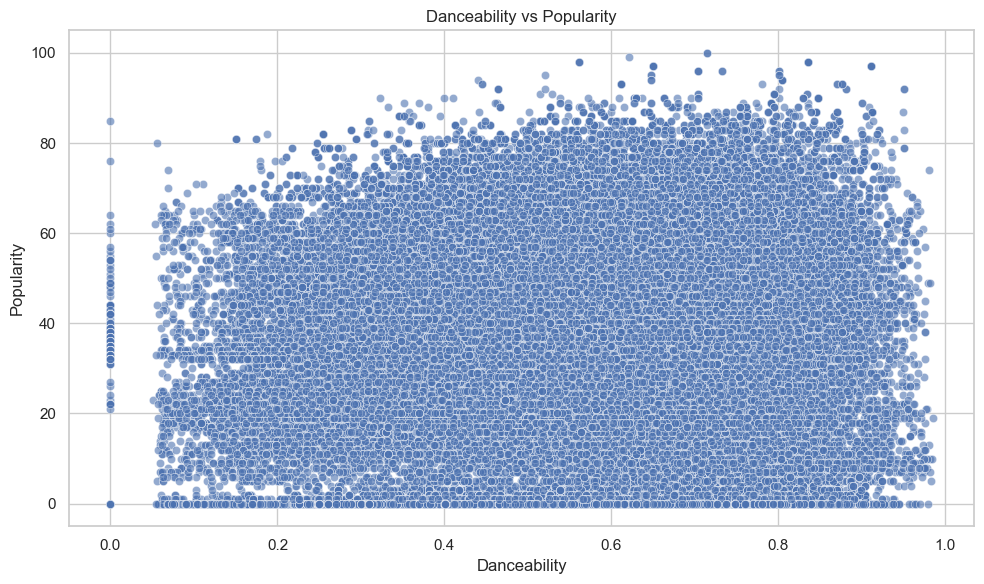

Average Danceability by Collaboration Presence:
has_collaborators
False    0.553514
True     0.603876
Name: danceability, dtype: float64


In [ ]:
popularity_threshold = df['popularity'].quantile(0.25)
low_popularity_genres = df[df['popularity'] < popularity_threshold]['track_genre'].unique()

print(f"Adjusted Popularity Threshold: {popularity_threshold}")
print(f"Number of Low-Popularity Genres: {len(low_popularity_genres)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='popularity', alpha=0.6)
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

df['has_collaborators'] = df['artists'].str.contains(';')
collab_avg_danceability = df.groupby('has_collaborators')['danceability'].mean()
print("Average Danceability by Collaboration Presence:")
print(collab_avg_danceability)


We can see from the scatterplot that dancabilitty does not show a strong correlation with popularity, we cannot necessarily say that if a song is more dancable, then it is popular.

Adittionally we can saee that using the has_collaborators value, songs that have collaborators generally have a higher dancability score. We can apply this to task 2.
As for task 3, as stated before the only metric that we have for listener engagement is the popularity metric. From the above scatterplot, there does not seem to be any sort of correlation between danceability and popularity.

To conclude, we can address each task specifically. We can see that the dataset does not directly show that there is infact any spillover on an album that has a successful song. The only sort of metric that is given for this would be popularity. In theory I would think that a popular and successful song on album would in fact make listeners want to listen to other songs in the album, but in practice this does not seem to be the case. As for task 2, we can see that from the graphs above, songs that have collaborators generally show an increase in stats across the board, like for eneryg, valence, and danceability slightly. Though there is a caveat to this statement, it is very genre specific. For example we can see that the groove, electro and indian genre all present very pronounced increases in the loudness, energy, and danceability metrics. This is mostly the same case as for Task 3, as we can see a general increase in popularity from multiple collaborators on the correlation strength metric.